In [6]:
import pandas as pd
import json

In [3]:
df = pd.read_csv("data/南海自由航行_news.csv")

In [4]:
df = df.dropna(subset=["content", "title"]) # 删除content, title中值为Nan的行
content_result = df[df['content'].str.contains('海军|南海|航行')] #找到'original_text'列中包含'南海'的所有行 
content_result

,news_id,app,area,comments,content,country,customer,emotion,entities,keyword,...,publishDay,referdomain,searchWord,searchengine,sourceType,time,title,url,userview,words
0,2953170214067542335,NaN,NaN,NaN,原标题：美方在南海开展“航行自由行动”？中方：人不犯我 我不犯人,NaN,光明网,0.0,NaN,南海 航行 标题,...,2018-05-30T16:00:00.000Z,NaN,NaN,NaN,0.0,2018-05-31T16:01:54.065Z,美方在南海开展“航行自由行动”？中方：人不犯我 我不犯人,https://m.gmw.cn/yidian/201805/31/29073716.htm...,134.0,南海:1.9827067797958493;航行:1;标题:1
1,6420366063709596226,NaN,NaN,"[{""against"":0,""agreeCount"":1,""ip"":""117.84.8.*""...",\n \n 外交部：坚决反对打着航行自由幌子损害南海沿岸国主权与安全利益的行为 \n...,NaN,凤凰网,0.0,NaN,南海 航行 美国 幌子 沿岸国 主权 国家 记者 彭斯 范围 记者会 责任编辑 联合国 邮箱...,...,2018-11-17T12:30:00.000Z,NaN,NaN,NaN,1.0,2018-11-17T14:05:55.429Z,外交部丨所谓南海航行与飞越自由就是一个伪命题,http://news.ifeng.com/a/20181117/60165103_0.shtml,1.0,南海:1;航行:0.7675166353607626;美国:0.54569704695083...
2,5384549581534703540,NaN,NaN,NaN,\n 一艘英国皇家海军军舰日前驶向越南途中，在接近中国于南海声索的岛屿附近航行，以彰显“...,NaN,多维新闻网,0.0,NaN,声索 中国 舰船 方面 越南 岛屿 英国皇家海军 军舰 南海 直升机 航行,...,2018-09-05T17:44:59.000Z,NaN,NaN,NaN,3.0,2018-09-06T09:30:22.399Z,英军舰驶近西沙群岛 遭中方护卫舰和直升机驱离,http://news.dwnews.com/china/news/2018-09-06/6...,0.0,声索:1.013797815819785;中国:1;舰船:0.798067100485445...
3,585798591747678951,NaN,NaN,NaN,外交部发言人华春莹16日在例行记者会上表示，中国坚定维护各国依据国际法所享有的真正的航行与飞...,NaN,手机人民网,0.0,NaN,南海 航行 美国 华春莹 记者 幌子 沿岸国 国家 主权 彭斯 范围 记者会 联合国 海洋法...,...,2018-11-16T16:00:00.000Z,NaN,NaN,NaN,0.0,2018-11-17T05:02:13.009Z,外交部:反对打着航行自由幌子损害南海沿岸国主权与安全利益的行为,https://m2.people.cn/r/MV8xXzMwNDA2MDExXzEwMTF...,293.0,南海:1;航行:0.7939541400137647;美国:0.55558297598878...
4,2799940456838117717,NaN,NaN,NaN,外交部发言人华春莹16日在例行记者会上表示，中国坚定维护各国依据国际法所享有的真正的航行与飞...,NaN,人民网,0.0,NaN,南海 航行 美国 华春莹 记者 幌子 沿岸国 国家 主权 彭斯 范围 记者会 联合国 海洋法...,...,2018-11-16T16:00:00.000Z,NaN,NaN,NaN,0.0,2018-11-17T07:03:25.592Z,外交部:反对打着航行自由幌子损害南海沿岸国主权与安全利益的行为,http://military.people.com.cn/n1/2018/1117/c10...,431.0,南海:1;航行:0.7939541400137646;美国:0.55558297598878...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,207736964632129839,NaN,NaN,[],\n 原标题：境外媒体：美军报告渲染中国军力威胁 \n 参考消息网8月18日报道 境外...,NaN,凤凰网,0.0,NaN,中国 发展 美国 国家 战略 海军 建设 台湾 国际 报告 和平 军队 现代化 经济 军事 ...,...,2018-08-18T04:40:00.000Z,NaN,NaN,NaN,1.0,2018-08-18T06:05:57.285Z,境外媒体：美军报告渲染中国军力威胁,http://news.ifeng.com/a/20180818/59875008_0.shtml,0.0,中国:1;发展:0.6065356616871492;美国:0.56782920502425...
4945,3101177661341813051,NaN,NaN,NaN,新华社布鲁塞尔4月9日电 第二十一次中国－欧盟领导人会晤联合声明全文如下：\n第二十一次中...,NaN,中国网,0.0,NaN,NaN,...,2019-04-09T16:00:00.000Z,NaN,NaN,NaN,0.0,2019-04-11T01:49:26.538Z,第二十一次中国－欧盟领导人会晤联合声明（全文）,http://news.china.com.cn/2019-04/10/content_74...,440.0,NaN
4946,1299161117918306340,NaN,NaN,NaN,\r\n 新华社布鲁塞尔4月9日电 第二十一次中国-欧盟领导人会晤联合声明全文如下：\r...,NaN,新浪网,0.0,NaN,NaN,...,2019-04-09T14:17:02.000Z,NaN,NaN,NaN,1.0,2019-04-10T16:04:53.841Z,中国－欧盟领导人会晤联合声明：不得强制转让技术,http://finance.sina.cn/china/gncj/2019-04-09/d...,NaN,NaN
4947,3972002245093098736,NaN,NaN,NaN,第二十一次中国－欧盟领导人会晤联合声明全文如下： 第二十一次中国－欧盟领导人会晤联合声明 （...,NaN,界面网,0.0,NaN,NaN,...,2019-04-09T14:17:00.000Z,NaN,NaN,NaN,2.0,2019-04-09T16:06:15.376Z,第二十一次中国－欧盟领导人会晤联合声明（全文）,https://www.jiemian.com/article/3026521.html,NaN,NaN


In [21]:
comment_news = df.dropna(subset=["content", "title", "comments"]) # 删除content, title, comments中值为Nan的行
result = {}
influence_list = []
for index, row in comment_news.iterrows():
    news_id = row['news_id']
    influence_rate = 0
    comment_list = []
    # 依据每条评论的agreeCount与against 计算新闻的影响力  
    for comment in eval(row['comments']):  # 利用eval函数将字符串转换成list形式
        # comment = json.loads(comment)
        total_count = comment['against'] + comment['agreeCount']
        influence_rate += total_count + 10 # 评论支持数 + 评论反对数 + 10(评论权重)
        influence_list.append(influence_rate) # 用于后续对影响力参数进行调整
        comment['totalCount'] = total_count
        comment_list.append(comment)
        
            
    comment_list = sorted(comment_list,key = lambda e:e.__getitem__('totalCount')) # 依据totalCount对评论进行排序
    
    result[news_id] = {
        'influence_rate': influence_rate,
        'comment_list': comment_list
    }
    # break
# print(json.dumps(result))
            


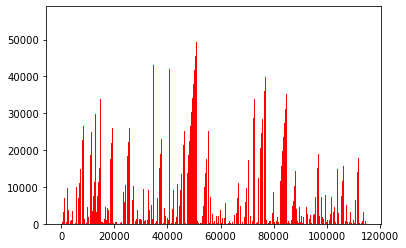

In [22]:
# 依据comment_list 画图
import matplotlib.pyplot as plt
 
plt.bar(range(len(influence_list)), influence_list,fc='r')
plt.show()